In [1]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
import os
import pickle
import torch
from collections import Counter

c:\Users\matth\miniconda3\envs\embeddings\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('works-2024.csv')

In [3]:
df.keys()

Index(['id', 'doi', 'title', 'display_name', 'relevance_score',
       'publication_year', 'publication_date', 'language', 'type',
       'type_crossref',
       ...
       'locations.source.type', 'locations.source',
       'sustainable_development_goals.id',
       'sustainable_development_goals.score',
       'sustainable_development_goals.display_name', 'grants.funder',
       'grants.funder_display_name', 'grants.award_id', 'counts_by_year.year',
       'counts_by_year.cited_by_count'],
      dtype='object', length=176)

In [4]:
df = df.sort_values(by=['cited_by_count'])

In [5]:
df_filtered = df.dropna(subset='abstract')

In [6]:
mistral = SentenceTransformer("zeta-alpha-ai/Zeta-Alpha-E5-Mistral",trust_remote_code=True)
mistral.to(torch.float16)

Loading checkpoint shards: 100%|██████████| 3/3 [00:03<00:00,  1.01s/it]


SentenceTransformer(
  (0): Transformer({'max_seq_length': 4096, 'do_lower_case': False}) with Transformer model: MistralModel 
  (1): Pooling({'word_embedding_dimension': 4096, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': False, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': True, 'include_prompt': True})
  (2): Normalize()
)

<Axes: >

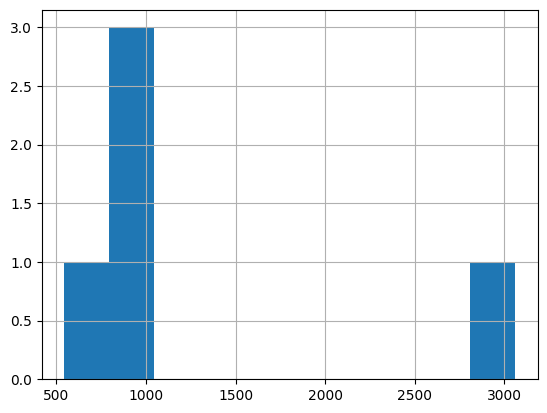

In [11]:
df_filtered['abstract'].map(len)[:5].hist()

In [19]:
df_filtered.keys()

Index(['id', 'doi', 'title', 'display_name', 'relevance_score',
       'publication_year', 'publication_date', 'language', 'type',
       'type_crossref',
       ...
       'locations.source.type', 'locations.source',
       'sustainable_development_goals.id',
       'sustainable_development_goals.score',
       'sustainable_development_goals.display_name', 'grants.funder',
       'grants.funder_display_name', 'grants.award_id', 'counts_by_year.year',
       'counts_by_year.cited_by_count'],
      dtype='object', length=176)

In [22]:
df_filtered_relevance = df_filtered.sort_values(by=['relevance_score'])[::-1]

In [23]:
temp = mistral.encode(df_filtered_relevance['abstract'].values[:10],batch_size=1,show_progress_bar=True)

Batches: 100%|██████████| 10/10 [01:20<00:00,  8.06s/it]


In [14]:
topic = 'Instruct: Retrieve abstracts that describe applications of a quantum sensor to the field of navigation.'
tempTopic = mistral.encode(topic)

In [24]:
tempTopic @ temp.T

array([0.575 , 0.614 , 0.566 , 0.6323, 0.5317, 0.606 , 0.603 , 0.5366,
       0.566 , 0.527 ], dtype=float16)

In [27]:
df_filtered_relevance['title'].values[3]

'Enhancing Gaussian quantum metrology with position-momentum correlations'